# Project 2: Computer-aided diagnosis

**Contents:** <br>

- [Goal](#goal)<br>
- [Deliverables](#deliverables)<br>
- [Assessment](#assessment)<br>

- [Guided project work](#guided_work)<br>

    A. [Linear regression for nuclei area measurement](#section_1)<br>
    
    B. [Logistic regression for nuclei classification](#section_2)<br>

    C. [Neural network training for nuclei classification](#section_3)<br>

    D. [Using k-NN for nuclei classification](#section_4)<br>
    
    E. [Reading assignment](#reading)<br>
    

<div id='references'></div>

**References:**<br>

[1] Veta M., van Diest P.J., Pluim J.P.W. 2016. Cutting Out the Middleman: Measuring Nuclear Area in Histopathology Slides Without Segmentation. Medical Image Computing and Computer-Assisted Intervention. [LINK](https://www.doi.org/10.1007/978-3-319-46723-8_73)

[2] Graham, S., Vu, Q. D., Raza, S. E. A., Azam, A., Tsang, Y. W., Kwak, J. T., & Rajpoot, N. 2019. Hover-net: Simultaneous segmentation and classification of nuclei in multi-tissue histology images. Medical Image Analysis, 58, 101563. [LINK](https://doi.org/10.1016/j.media.2019.101563)

<div id='goal'></div>
<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div> 

## Goal
Implement and apply linear regression, logistic regression, a neural network and $k$-NN for classifying nuclei size in histopathology images, and evaluate and analyze the results.

The size of the cell nuclei of the tumor in breast cancer patients can be indicative of the outcome. Large nuclei size indicates more aggressive tumor and in turn worse prognosis for the patient. As part of their routine work, pathologists make qualitative evaluation of the size of the nuclei by examining the tissue under a microscope. Quantitative measurement (e.g. by manual segmentation) is a much better solution, however, it is unfeasible as it takes additional time away from the busy pathologists. A solution to this problem is to develop an automatic method for measurement of nuclei area.

All data required for this mini-project is provided with the code handout. In the exercises, you applied regression and classification methods on toy datasets, and in the project work you will apply the same methods to a dataset of RGB images of nuclei with size $24\times24$ pixels. The images originate from the dataset that was previously described in [Veta et al. (2015)](#references). 

<div id='deliverables'></div>

## Deliverables
There is no hard limit for the length of the report, however, concise and short reports are **strongly** encouraged. Aim to present your most important findings in the main body of the report and (if needed) any additional information in an appendix. The following report structure is suggested for the main body of the report:

1. Introduction
2. Methods
3. Results
4. Discussion
5. Reading assignment (see below)

The introduction and result sections can be very brief in this case (e.g. half a page each). The discussion section should contain the analysis of the results.

The report must be submitted as a single PDF file. The code must be submitted as a single archive file (e.g. zip) that is self-contained and can be used to reproduce the results in the report. 

Note that there is not a single correct solution for the project. You have to demonstrate to the reader that you understand the methods that you have studied and can critically analyze the results of applying the methods. Below, you can find a set of assignments (guided project work) that will help you get started with the project work and when correctly completed will present you with a **minimal solution**. Solutions which go beyond these assignments are of course encouraged. 

Code and a report describing your implementation, results and analysis. 

## Assessment
The rubric that will be used for assessment of the project work is given in [this table](https://github.com/tueimage/8dc00-mia/blob/master/rubric.md)

<div id='assessment'></div>

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
print('it works!')

it works!


<div id='guided_work'></div>

## Guided project work

<div id='section_1'></div>

### A. Linear regression for nuclei area measurement

The Python function `nuclei_measurement()` implements training of a linear regression model for measuring the area of nuclei in microscopy images. The dataset for this problem consists of small RGB images of size $24 \times 24$ pixels with a nucleus in the center. Such images can be obtained, for example, by cropping from larger images after performing a nuclei detection step. The targets are the areas of the  nucleus in the center of the image obtained by manual measurement. The linear regression model that we are going to train will enable us to automatically measure the size of new, previously unseen samples (without resorting to manual measurement).

The first section of code loads and prepares the dataset. The data is already split into a training and testing set, each containing more than $20,000$ samples (a validation dataset is not needed as we are not going to perform model selection, i.e. we are going to stick to linear regression). The last few lines of the first section of code visualize the $300$ smallest and $300$ largest nuclei in the training dataset.

In this example, we are not going to perform feature extraction but use the raw pixel values as features. Since each sample is an RGB image with size $24 \times 24$ pixels, we end up with $24 \times 24 \times 3=1728$ features. Locate the code that reshapes each image into a feature vector and make sure you understand how it works. 

test error full: 187.4555877121537
test error reduced: 273.5799350023969


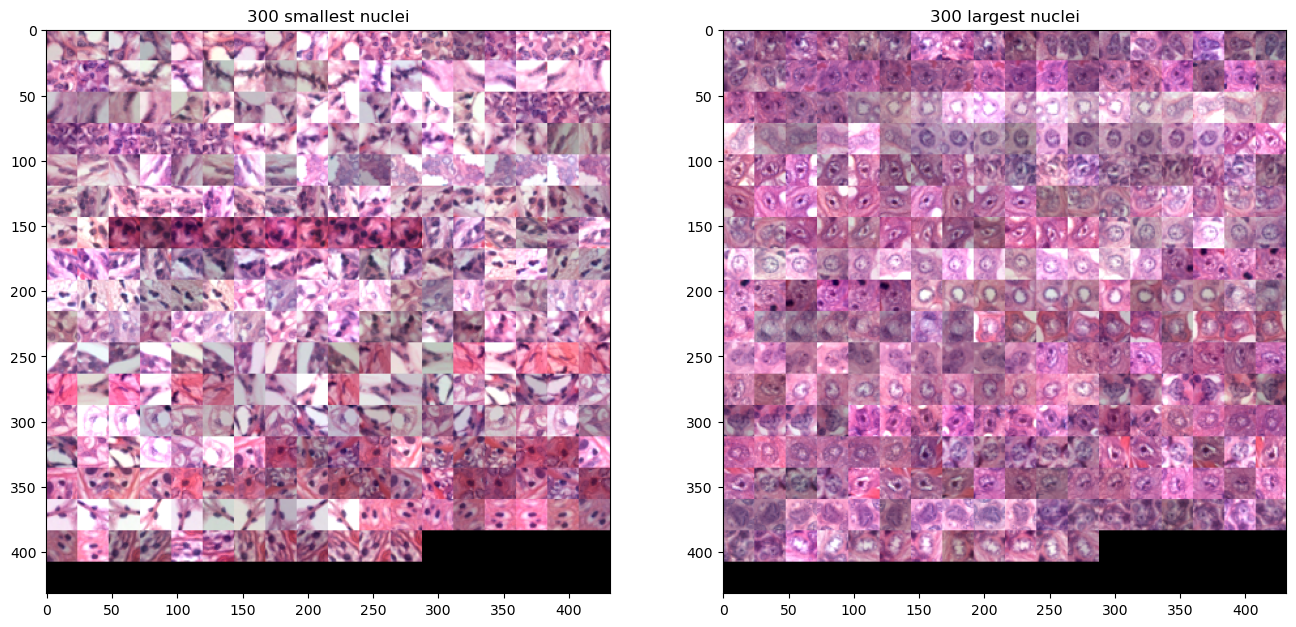

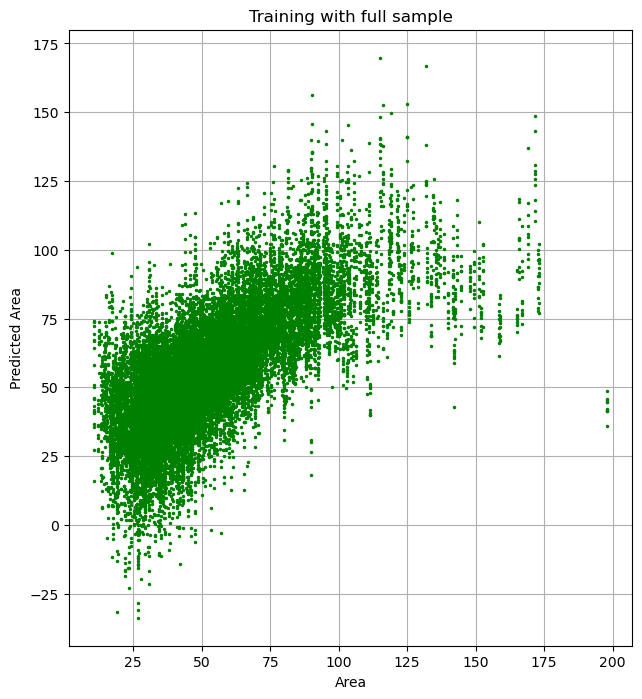

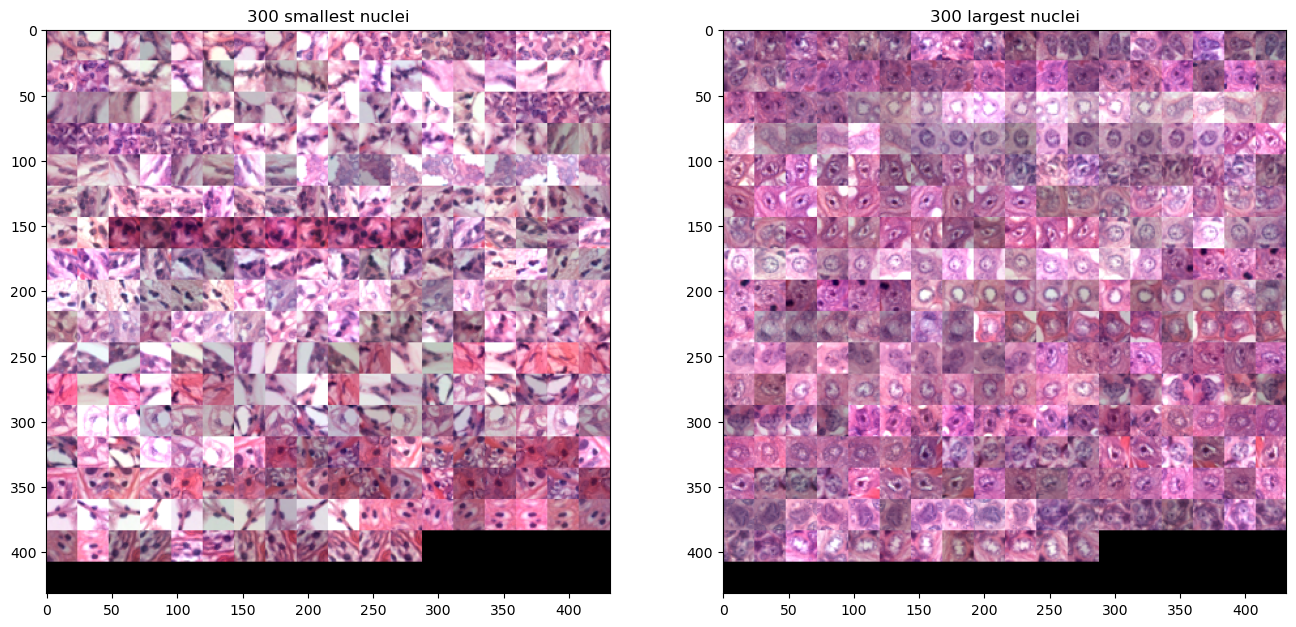

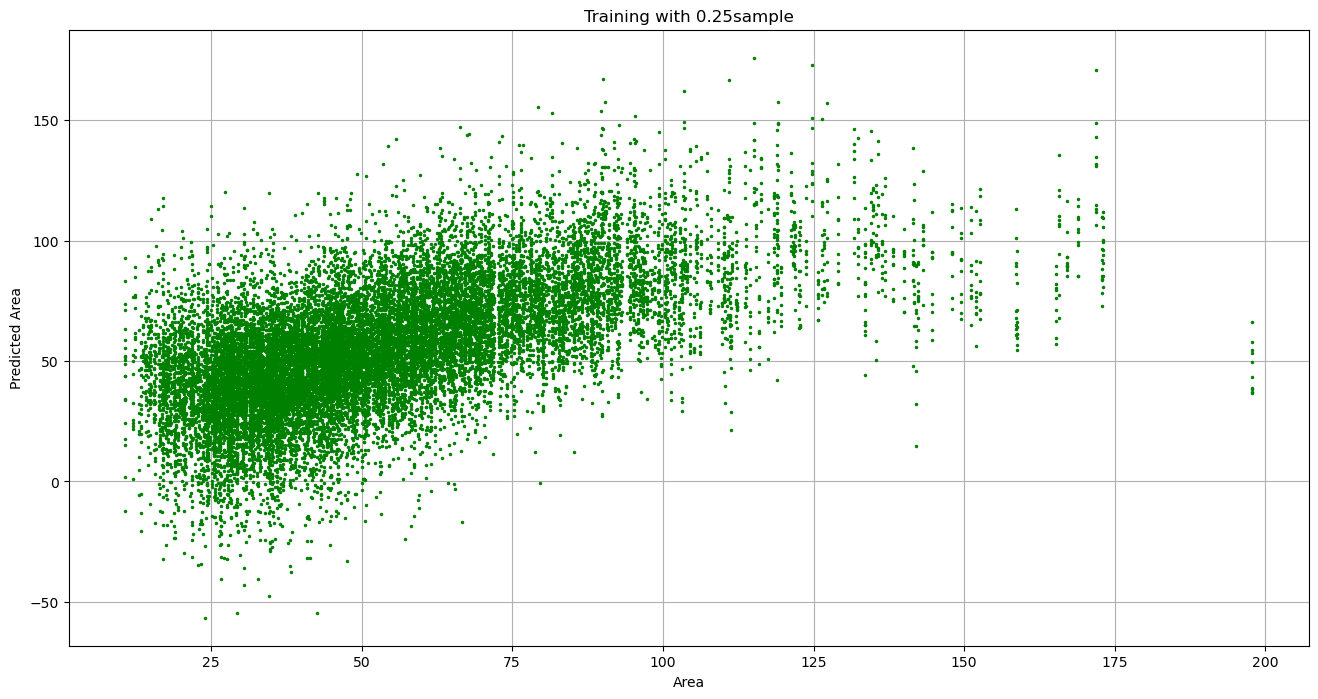

In [4]:
%matplotlib inline
import sys
sys.path.append("../code")
from cad_project import nuclei_measurement

nuclei_measurement()
error = nuclei_measurement(reduce = True, fraction =  0.25)

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Task 1*: 
Implement the missing functionality for training a linear regression model for automatic measurement of the nuclei area. Evaluate the performance on the independent test dataset. The next lines of code plot the predicted vs. the actual area. What is your analysis of the results shown in the plot?

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Task 2*: 
Train a new linear regression model with a reduced number of training samples. Which model results in larger error on the testing set and why? 


task 1: The performance was evaluated by computing the error on the test dataset. As can be seen: test error full: 187.4555877121537. This is reflected in the plot. If all items were classified correctly, then there would be a line going through 0 and all items would have the same x and y value. This is not the case however and the items are classified too high usually because all the items are above the middle line just described.

task 2: the test error on the reduced dataset: 284.8584250513645, so the test error for the full dataset is lower than for the reduced dataset. Therefore, we can conclude that the full dataset has better performance. Because there are more datapoint the full dataset trial has better performance, it is able to generalize more to independent test data. 

<div id='section_2'></div>

### B. Logistic regression for nuclei classification

The Python function `nuclei_classification()` implements the training of a logistic regression model that classifies nuclei into the classes "large" (class label $y = 1$) and "small" (class label $y = 0$). Examine the code and comments and make sure that you understand what it does. One notable difference from before is that this code uses the analytical expression for the gradient of the loss function, instead of computing it numerically with `ngradient` as before. Using `ngradient` will also work, but is much slower. The script is mostly complete. The only missing component is the values for the parameters of the training process.

In [5]:
%matplotlib inline
import sys
sys.path.append("../code")
from cad_project import nuclei_classification
import numpy as np
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

In [6]:
output = []

mu =  [0.00005, 0.0001, 0.00025, 0.0005]
num_iterations = 200 #[10,20,50]
batch_size = [10, 25, 50, 100, 150]

best_accuracy = 0
for mu_iter in mu:
    # for num_iter in num_iterations:   
    for batch in batch_size:
        
        model_output = nuclei_classification(mu_iter, num_iterations, batch, visualization =False)
        output.append(model_output)
        
        print(mu_iter, num_iterations, batch)
        
        if model_output[0] > best_accuracy:
            best_accuracy = model_output[0]
            print('best accuracy: ' , model_output[0])
            print('in the settings:', model_output[3], model_output[4], model_output[5])
            
            # plt.plot(np.linspace(0, num_iterations, num_iterations), model_output[1])
            # plt.plot(np.linspace(0, num_iterations, num_iterations), model_output[1])
            # plt.show()

KeyboardInterrupt: 


best accuracy:  81.27%
in the settings: mu = 0.0001 iterations = 200  batchsize = 100

In [ ]:
learning_rate = 0.0001
batch_size = 100
num_iterations = 200
output = nuclei_classification(learning_rate, num_iterations, batch_size)
output = nuclei_classification(learning_rate, num_iterations, batch_size, reduced_train_data=True)

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Task 3*: 

1. Select values for the learning rate, batch size and number of iterations (these are sometimes called hyper-parameters of the model), as well as initial values for the model parameters that will result in fast training of an accurate model for this classification problem. Note that if you don't choose the hyper-parameters and initial parameters well, the resulting loss might be out of range of the plot.
    
    Experiment with a few variations of the parameters and analyze and compare the resulting loss curves. Describe how the different hyper-parameters influence the training process.
    
2. Instead of running gradient descent for a fixed number of iterations, can you propose a stopping criterion for the training?

3. Report the classification accuracy for your best trained model.

4. Reduce the size of the training set by a very large factor (e.g. 0.5% of the original number of samples). Train the model with this reduced number of samples. Does the model overfit the training dataset? How did you come to this conclusion?

1. for experimentation i made a loop that went over different parameter values, first i put them on a range of 0.01 to 0.5 and batchsizes from 10 to 100. It showed in the plots that the settings of mu = 0.01 and batch_size = 10 showed on the graph. Therefore, i started exploring this area.
The parameters influence the process in different ways. If the learning rate is too high, the loss will not show up in the graph because the model is not converging because of the big learning steps which results in an instable model. Then, a too small learning rate causes the model to not converge because the learning is too slow.
The number of iterations has to be sufficient in order to make the model get to a low loss. If we do not train for enough iterations the model will not get here even if we have the right parameters. Therefore, having a good amount of iterations is desirable.
Finally, the batch_size is the amount of items that are trained on during each iteration. when having a low number here, the model has more noise in its updates but will converge faster. Too high batch size requires more updates because there is less noise in the update.

2. A stopping criterion would be when the validation loss would no longer improve or even worsen for x amount of iterations. This shows that the model is starting to overfit (losing generalization) and we do not want that.

3. After modifying the code to compute the accuracy for the test data, the highest accuracy for the test data in us at settings: learning_rate = 0.0001 iterations = 200 batchsize = 100 Test accuracy: 81.27%


4. after modifying the code to train on less data: the accuracy became:Test accuracy: 72.55 The model overfits the training data because the test data accuracy went down and the validation loss went up. Since the model is trained on the training data it should have the correct answers for these cases, however because there is so little data the model will rely too much on those instances and overfit on then, making the model less generalizable. The validation shows this too, because the validation loss is there to check if the model is still getting better, but since the loss is going up it is overfitting because the training data still goes down. This is reflected in the accuracy on the test data.



<div id='section_3'></div>

### C. Neural network training for nuclei classification

The code in SECTION 3 of the `cad_test.py` file, enabled you to train a neural network that classifies whether the input image contains a large or small nuclei. During the training of this network the hyper parameters (i.e. batch size, learning rate, number of iterations, ...) have been kept fixed.
However, these parameters can be a crucial factor in optimizing your model results. Therefore we are going to investigate the effect of these parameters on the loss curve behaviour and accuracy of the model. To put the improvements in perspective, we are also going to compare these results to the Logistic Regression model (see Task 4.1).

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Task 4*:

1. Select values for the learning rate, batch size and number of iterations similar to those used in Task 4. Analyze and compare the resulting loss curves with the loss curves obtained from the logistic regression. What do you observe? Also, report the accuracy of the methods you compare. Is there a best one?
2. Now, with a fixed set of hyper parameters, try to change the size of the hidden layer and report the obtained loss curves. How do the number of parameters of the model influence the loss curve? Can you think of an appropriate number of parameters for this dataset?


1. First, note that the amount of iterations for logistic regression (LG) have decreased to 100 in order to have the same amount of iterations as the neural networks (NN). This is important for comparing the results. First thing to notice is that for NN the loss values are much less fluctuating than that of the LG. This is due to the batch size being too small for LG, this causes the fluctuation because the difference between batches is too big. However, a smaller batch size also means slower convergence so in this case it is desired. Also LG starts at a higher loss, around 0.7 in the first iterations. For NN, the loss starts at 0.4. We can also see that both models are not fully converged yet and probably need more iterations in order to get the best model. We can see this because the both validation lines are still going down and have not flattened. It also looks like for NN the learning rate is too small as the accuracy is worse than that of LG. Finally, the accuracy of LG on the test set is 80,55%, while that of NN is 71% meaning we can conclude that LG does a better job on this classification than NN.

2. Due to time constraints the number of epochs is chosen to be 50. We believe that this is still enough epochs to see the effects of the model because in the previous assignment we have seen that from epoch 50 onwards not much happens anymore in the model. Furthermore, the learning rate is restored to 0.01 which is was originally to up the performance of the model. Batch size stays the same. Firstly, A lower hidden layer size results in a biggen training loss. However, this seems to help the model because as the training loss goes down for the bigger layer sizes the model starts overfitting. This does not happen for the lower layer sizes and the validation loss generally does not go up, which is good.  Moreover, The model starts overfitting faster in the bigger layer sizes. The validation line goes up quicker in those curves. The accuracy seems to be better for lower layer sizes since you see decreasing curves for validation accuracy for the bigger layer sizes. Also, the test accuracy is better for lower layer sizes. I think the approriate number of parameters in this dataset is around 2. Because here the accuracy is higher and the validation line does not go up as fast as the bigger layer sizes.

In [ ]:
%matplotlib inline
import sys
sys.path.append("../code")
from cad_project import nuclei_classification
import cad_tests as test
from IPython.display import display, clear_output

In [ ]:
learning_rate = 0.0001
batch_size = 100
num_iterations = 100
output = nuclei_classification(learning_rate, num_iterations, batch_size)

In [ ]:
learning_rate = 0.0001
batch_size = 100
num_iterations = 100
n_features = 1000
training = test.Training()
training.data_preprocessing()
training.define_shapes(learning_rate, batch_size, num_iterations)
training.launch_training()
training.pass_on_test_set()

In [ ]:
learning_rate = 0.01
batch_size = 100
num_iterations = 50
n_features = [2, 10, 25, 50, 100, 500, 1000]

accuracies = []
for n in n_features:
    print('hidden layer size: ' , str(n))
    training = test.Training()
    training.data_preprocessing()
    training.define_shapes(learning_rate, batch_size, n)
    training.launch_training(num_iterations)
    accuracies.append(training.pass_on_test_set())
    

In [ ]:
for accuracy, n in zip(accuracies, n_features):
    
    print('size of hidden layers ', str(n), ' gives accuracy ' , str(accuracy))

<div id='section_4'></div>

### D. Using $k$-NN for nuclei classification
In Notebook 2.1 we have introduced the $k$-NN algorithm, in Notebook 2.4 the PCA method was introduced. In this task we would like to combine these two to create a new classifier.
How does a clustering algorithm hold up against the algorithm you have implemented thus far?

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Task 5*:
1. Use the training set of the cell nuceli data for the $k$-NN algorithm. Next, use the test set to classify the images with this algorithm. How did you choose the parameter $k$? What happens to the accuracy when you first use PCA to reduce the dimensions on the data, how many components do you keep?
2. Report the accuracy, and compare it to the best performing neural network, logistic regression and linear regression models. What do you see?

1. K was chosen by looking at the best accuracy at different k's from 20 to 50. The optimal k was chosen that had the best accuracy, namely 44. this had the best cross validation score. The accuracy of kNN goes down when first having used PCA from accuracy: 0.7320791123974916 to 0.7198263386396527. The amount of components to keep is decided by looking at what captures 95% of the data. In the plot can be seen how much variance in captured in the components. If we then sum all the variance until it is bigger than 0.95 and add one component extra we capture 95% of the variance in the data. This is sufficient to make computation faster with less dimensions. Taking all this into account, the ultimate number to keep was 133 components.
2. if we compare it to the logistic, linear and neural network. The best performing logistic regression has an accuracy of 81.27%, the best neural network has an accuracy of 82% and the linear regression model has an error of 187.4555877121537. The kNN algorithm has an accuracy of 0.7320791123974916 at the optimal k = 44. From this we can see that kNN is not the best model for this dataset because it has the lowest test accuracy. We cannot compare linear regression with clasification sadly so we leave out linear regression from the discussion. For logistic regression and neural networks we see that neural networks has a slightly better performance than logistic so the best model would be neural networks.

In [ ]:
%matplotlib inline
import sys
import numpy as np
sys.path.append("../code")
from cad_project import nuclei_classification
import cad_tests as test
import cad 
from IPython.display import display, clear_output
import scipy.io
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score
import cad_util as util
from sklearn.decomposition import PCA


In [ ]:
fn = '../data/nuclei_data_classification.mat'
mat = scipy.io.loadmat(fn)

test_images = mat["test_images"] # (24, 24, 3, 20730)
test_y = mat["test_y"] # (20730, 1)
training_images = mat["training_images"] # (24, 24, 3, 14607)
training_y = mat["training_y"] # (14607, 1)
validation_images = mat["validation_images"] # (24, 24, 3, 7303)
validation_y = mat["validation_y"] # (7303, 1)
training_y = training_y.ravel()

## dataset preparation
training_x, validation_x, test_x = util.reshape_and_normalize(training_images, validation_images, test_images)      


In [ ]:
k_values = list(range(20, 50))  # Test k from 1 to 10

cv_scores = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, training_x, training_y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(scores.mean())

optimal_k = k_values[np.argmax(cv_scores)]

plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.show()

print("Optimal k:", optimal_k)

In [ ]:
k = 44
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(training_x, training_y)
y_pred = knn_classifier.predict(test_x)
accuracy = accuracy_score(test_y, y_pred)
print("accuracy:", accuracy)

imageSize = training_images.shape

In [ ]:
mean = np.mean(training_x, axis=0)
std_dev = np.std(training_x, axis=0)
standardized_data = (training_x - mean) / std_dev

pca = PCA()
pca.fit(standardized_data)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
n_components = np.argmax(cumulative_variance >= 0.95) + 1

import matplotlib.pyplot as plt
plt.plot(range(1, len(explained_variance[:100]) + 1), explained_variance[:100], marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()
print(n_components)

pca = PCA(n_components=n_components)
pca.fit(standardized_data)
training_x_pca = pca.transform(training_x)
test_x_pca = pca.transform(test_x)

k = 44
knn_classifier_pca = KNeighborsClassifier(n_neighbors=k)
knn_classifier_pca.fit(training_x_pca, training_y)
y_pred =knn_classifier_pca.predict(test_x_pca)
accuracy = accuracy_score(test_y, y_pred)
print("accuracy pca:", accuracy)


<div id='reading'></div>

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/read_ico.png" width="42" height="42"></div>

### E. Reading assignment

In recent literature, various deep learning-based methods have been proposed for cell nuclei segmentation and classification. In this reading assignment, you are asked to carefully study the paper by [Graham et al. (2019)](#references).

<div style="float:right;margin:-5px 5px"><img src="../reader/assets/todo_ico.png" width="42" height="42"></div> 

### *Task 6*:
In a separate section of your project report (~ half a page), compare your own linear (section A) and logistic (section B) regression-based methods and your small neural network (section C) with the deep neural network proposed by Graham et al. (2019). Start with giving a brief summary of the method proposed by Graham et al. What are the advantages of their method, and what are its weak points/disadvantages?

<div id='section_1'></div>

## Additional Assignment

### What is the effect of the size of the test data on linear regression?

Edited the nuclei_measurement function such that it can use fractions of the data.

In [ ]:
%matplotlib inline
import sys
sys.path.append("../code")
from cad_project import nuclei_measurement
import matplotlib.pyplot as plt

error = []
fractions = [0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 1]
for frac in fractions:
    print('fraction: ' , str(frac))
    error.append(nuclei_measurement(reduce = True, fraction =  frac))


fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(fractions, error)
ax.set_title(f'Error over different dataset sizes for linear regression')
ax.set_ylabel('mean squared error'); ax.set_xlabel('dataset size')
# ax.set_xticks(fractions); ax.set_ylim([0, max(error)])


## Effect of amount of hidden layers in neural network

edited the training() class such that hidden layers can be added and removed with parameters. this was the amount of hidden layers can be edited and tested what the optimal amount is. We take the standard parameters learning_rate = 0.01, 

In [3]:

import sys
sys.path.append("../code")

from cad_tests import n_hidden_neural_network
import cad_tests
import importlib 
importlib.reload(cad_tests)
import matplotlib.pyplot as plt

In [5]:


learning_rate = 0.01
batchsize = 100
hidden_features = 100
num_hidden_layers = [2, 3, 5,7, 10, 15, 30]
epochs = 20
accuracies_network = []
for layer in num_hidden_layers:
    nn = n_hidden_neural_network()
    nn.data_preprocessing()
    nn.launch_training(learning_rate, batchsize, hidden_features, layer, epochs)
    accuracies_network.append(nn.pass_on_test_set())


KeyboardInterrupt: 

Text(0.5, 0, 'number hidden layers')

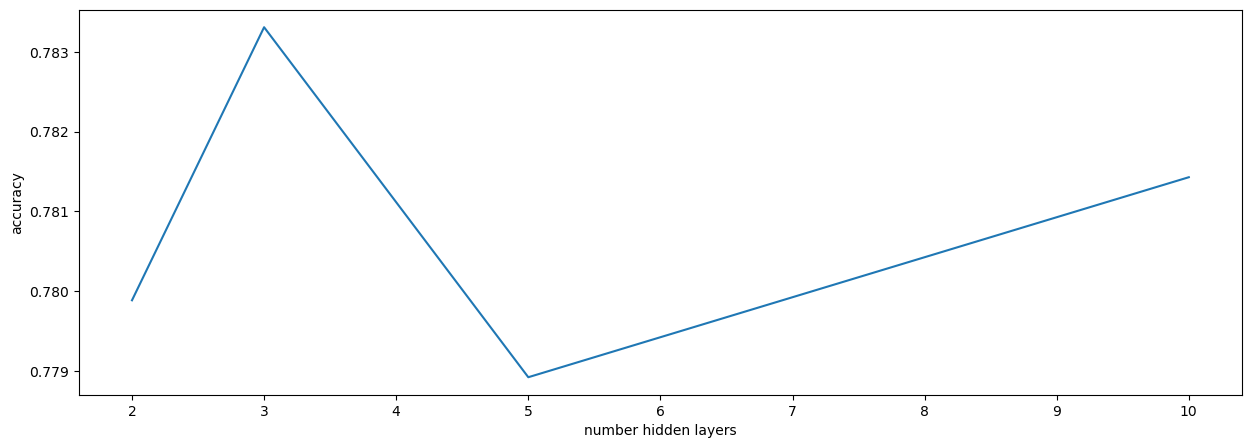

In [4]:
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(num_hidden_layers, accuracies_network)
ax.set_title(f'')
ax.set_ylabel('accuracy'); ax.set_xlabel('number hidden layers')

## effect of amount of variance captured in the data on the accuracy of kNN

When performing pca, the choice of amount of variance captured in the transformed data is an important parameter to get the best accuracy. Here, we perform an analysis on the effect of the amount of variance taken in pca (by chosing the n components) on the accuracy of kNN. The amount of neighbours k here is taken to be 44 again.

In [12]:
%matplotlib inline
import sys
import numpy as np
sys.path.append("../code")
from cad_project import nuclei_classification
import cad_tests as test
import cad 
from IPython.display import display, clear_output
import scipy.io
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score
import cad_util as util
from sklearn.decomposition import PCA


In [10]:
fn = '../data/nuclei_data_classification.mat'
mat = scipy.io.loadmat(fn)

test_images = mat["test_images"] # (24, 24, 3, 20730)
test_y = mat["test_y"] # (20730, 1)
training_images = mat["training_images"] # (24, 24, 3, 14607)
training_y = mat["training_y"] # (14607, 1)
validation_images = mat["validation_images"] # (24, 24, 3, 7303)
validation_y = mat["validation_y"] # (7303, 1)
training_y = training_y.ravel()

## dataset preparation
training_x, validation_x, test_x = util.reshape_and_normalize(training_images, validation_images, test_images)      


for variance 0.1we have this amount of components1
accuracy pca: 0.526917510853835
for variance 0.25we have this amount of components1
accuracy pca: 0.526917510853835
for variance 0.5we have this amount of components2
accuracy pca: 0.5351181862035697
for variance 0.75we have this amount of components16
accuracy pca: 0.6689821514712976
for variance 1we have this amount of components1
accuracy pca: 0.526917510853835


Text(0, 0.5, 'accuracy')

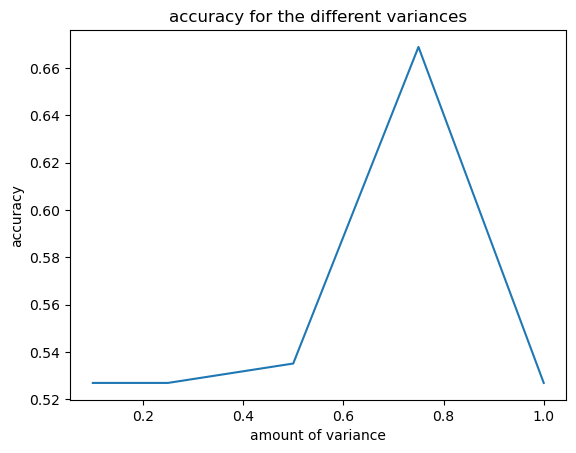

In [15]:
mean = np.mean(training_x, axis=0)
std_dev = np.std(training_x, axis=0)
standardized_data = (training_x - mean) / std_dev

variances = [0.1, 0.25, 0.5, 0.75, 1]
accuracies = []
for variance in variances:
    pca = PCA()
    pca.fit(standardized_data)
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    n_components = np.argmax(cumulative_variance >= variance) + 1
    print('for variance ' + str(variance) + 'we have this amount of components'+ str(n_components))

    pca = PCA(n_components=n_components)
    pca.fit(standardized_data)
    training_x_pca = pca.transform(training_x)
    test_x_pca = pca.transform(test_x)

    k = 44
    knn_classifier_pca = KNeighborsClassifier(n_neighbors=k)
    knn_classifier_pca.fit(training_x_pca, training_y)
    y_pred =knn_classifier_pca.predict(test_x_pca)
    accuracy = accuracy_score(test_y, y_pred)
    accuracies.append(accuracy)
    print("accuracy pca:", accuracy)
    
plt.plot(variances, accuracies)
plt.title('accuracy for the different variances')
plt.xlabel('amount of variance')
plt.ylabel( 'accuracy')
